# Hairloss Analysis
[_A DataCamp challenge_](https://datacamp.com)
![](img/why-hair-loss.jpg)
Nov, 2024
> Data Analysis, Machine Learning

## The project
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## The data
Data contains information on persons in this survey. Each row represents one person.
- `Id` - A unique identifier for each person.
- `Genetics` - Whether the person has a family history of baldness.
- `Hormonal Changes` - Indicates whether the individual has experienced hormonal changes (Yes/No).
- `Medical Conditions` - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- `Medications & Treatments` - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- `Nutritional Deficiencies` - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- `Stress` - Indicates the stress level of the individual (Low/Moderate/High).
- `Age` - Represents the age of the individual.
- `Poor Hair Care Habits` - Indicates whether the individual practices poor hair care habits (Yes/No).
- `Environmental Factors` - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- `Smoking` - Indicates whether the individual smokes (Yes/No).
- `Weight Loss` - Indicates whether the individual has experienced significant weight loss (Yes/No).
- `Hair Loss` - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

## Data validation
### Read the data

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Read the data from file
hairloss = pd.read_csv("data/Predict Hair Fall.csv")
hairloss

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


### Check data quality
#### Missing values

In [2]:
# Dataframe info
hairloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


There are no missing values.

#### Duplicated values

In [3]:
# Look for duplicated rows
hairloss.duplicated().sum()

0

There are no complete duplicated rows.

Let's see if Id values (which should be unique) are duplicated:

In [4]:
hairloss.loc[hairloss.duplicated(subset=["Id"], keep=False), :].sort_values(by=["Id"])

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
388,110171,Yes,No,Thyroid Problems,Antifungal Cream,Selenium deficiency,Low,25,Yes,No,Yes,Yes,0
408,110171,No,No,Psoriasis,Immunomodulators,Vitamin E deficiency,Low,41,Yes,No,No,Yes,0
237,157627,Yes,No,Dermatosis,Rogaine,Protein deficiency,Moderate,47,Yes,No,Yes,Yes,1
600,157627,No,No,Thyroid Problems,Accutane,Protein deficiency,Moderate,44,Yes,Yes,Yes,Yes,0
118,172639,Yes,Yes,Androgenetic Alopecia,Heart Medication,Iron deficiency,Moderate,29,Yes,No,Yes,No,1
866,172639,Yes,Yes,No Data,Accutane,Vitamin A Deficiency,Low,47,Yes,No,No,Yes,0
669,186979,No,No,Seborrheic Dermatitis,Blood Pressure Medication,Vitamin E deficiency,Moderate,41,No,No,No,No,1
956,186979,Yes,Yes,Seborrheic Dermatitis,Chemotherapy,No Data,Moderate,21,No,No,Yes,No,1


There are duplicated ID numbers, but they look like different records. I will leave them because Id numbers are not going to be considered in the analysis.

#### Data integrity
I noticed that column names have trailing whitespaces, which can cause some problems adressing the names in the analysis, so I will remove them.

In [5]:
# Column names
hairloss.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [6]:
# Remove leading and trailing whitespaces in the column name
hairloss.columns = hairloss.columns.str.strip()
hairloss.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss'],
      dtype='object')

### Check value range: categorical variables
Let’s see if variables of type ‘object’ (strings) contain categories.

In [7]:
# Select column names of object type
object_cols = hairloss.select_dtypes(include="object").columns
object_cols

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss'],
      dtype='object')

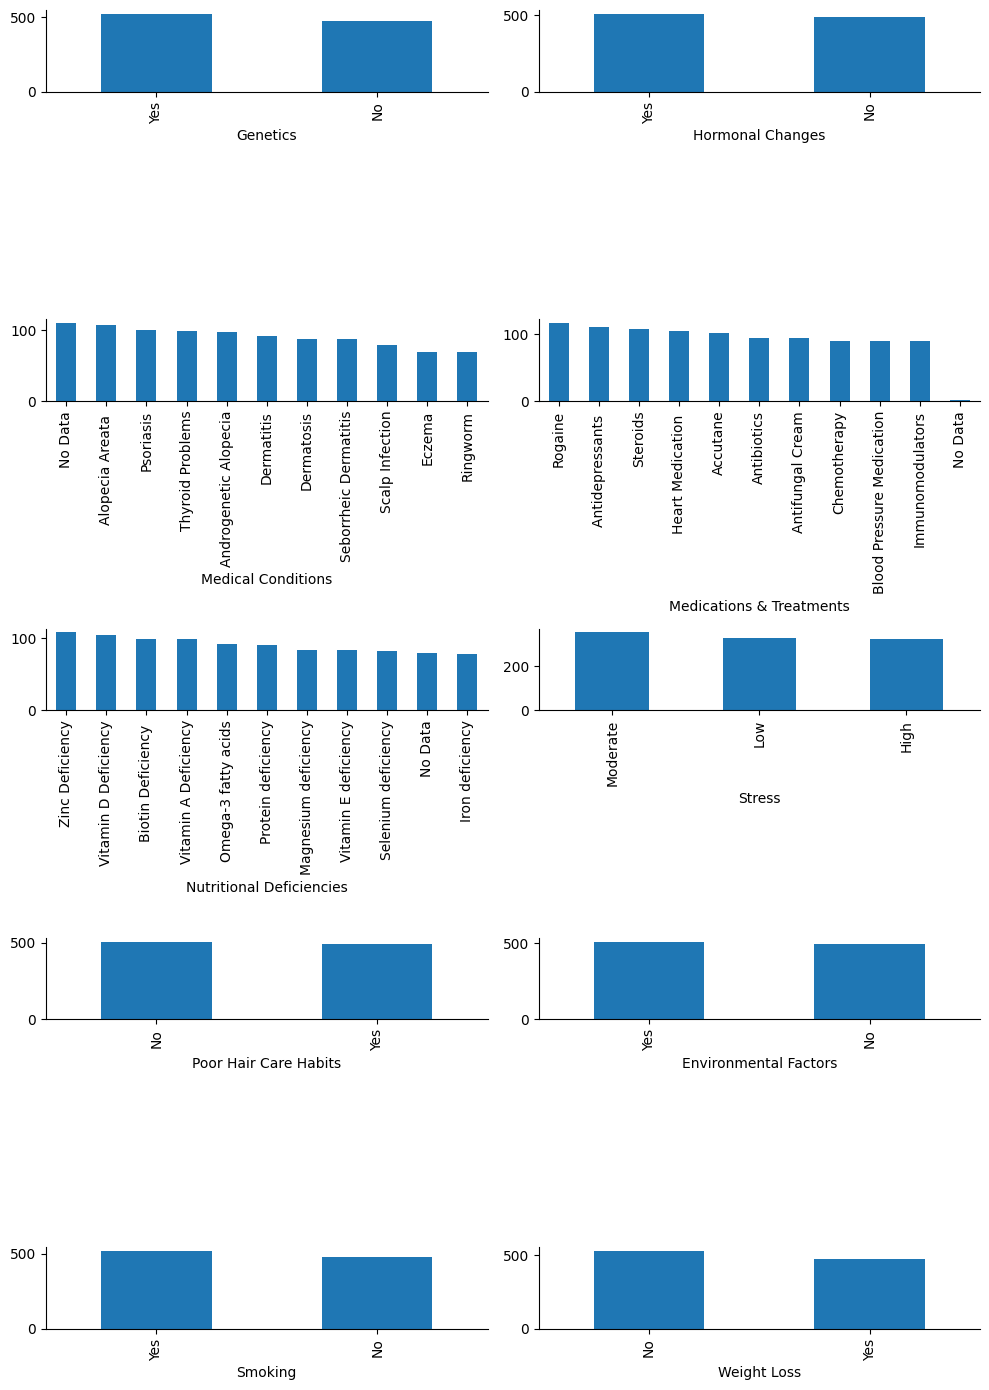

In [8]:
# Plot their values and counts
fig, ax = plt.subplots(int(len(object_cols) / 2), 2, figsize=(10, 14))
i = 0
for col in object_cols:
    x = int(i / 2)
    y = i % 2
    sns.despine()
    hairloss[col].value_counts().plot(ax=ax[x, y], kind="bar")
    i += 1

fig.tight_layout()
plt.show()

Yes, they are all categories, so I will convert them as such.

In [9]:
# Convert to categorical the rest of the object columns
conversion_dict = {
    k: "category" for k in hairloss.select_dtypes(include="object").columns
}
hairloss = hairloss.astype(conversion_dict)

# Check the data types
hairloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Id                        999 non-null    int64   
 1   Genetics                  999 non-null    category
 2   Hormonal Changes          999 non-null    category
 3   Medical Conditions        999 non-null    category
 4   Medications & Treatments  999 non-null    category
 5   Nutritional Deficiencies  999 non-null    category
 6   Stress                    999 non-null    category
 7   Age                       999 non-null    int64   
 8   Poor Hair Care Habits     999 non-null    category
 9   Environmental Factors     999 non-null    category
 10  Smoking                   999 non-null    category
 11  Weight Loss               999 non-null    category
 12  Hair Loss                 999 non-null    int64   
dtypes: category(10), int64(3)
memory usage: 35.3 KB


Let's see how balanced is the target variable "Hair Loss":

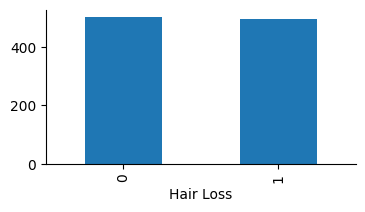

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(4, 2))
sns.despine()
hairloss["Hair Loss"].value_counts().plot(ax=ax, kind="bar")
plt.show()

### Check value range: numerical variables

Plot histogram of variable "Age" to get a sense of the value range.

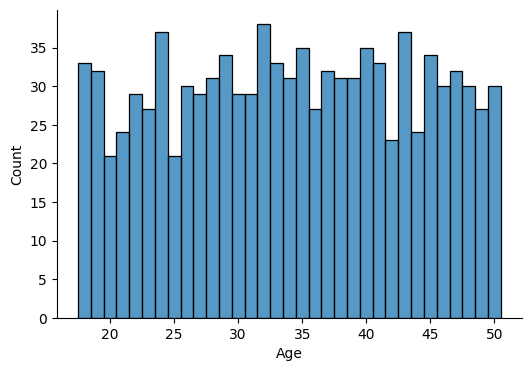

In [11]:
# Plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.despine()
sns.histplot(hairloss["Age"], ax=ax, discrete=True)
plt.show()

I will establish age intervals for the purpose of the analysis. I choose:
- [18, 30)
- [30, 40)
- [40, 52)

In [12]:
# Establish age intervals according to available ages
bins = pd.IntervalIndex.from_tuples([(18, 30), (30, 40), (40, 51)], closed="left")

# Create new column with age intervals as category type
hairloss["age_group"] = pd.cut(hairloss["Age"], bins)
hairloss["age_group"] = hairloss["age_group"].astype("category")
hairloss.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,age_group
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0,"[18, 30)"
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0,"[40, 51)"
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0,"[18, 30)"
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0,"[40, 51)"
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1,"[30, 40)"


## Exploratory Analysis
Here is the strategy I will use for conducting the exploratory analysis: I will divide the categories into "conditions" on one side and "factors" on the other, to visualize how the latter influence the former.

In [13]:
# Select category type column names
category_columns = hairloss.select_dtypes(include="category").columns

# Store names of categories with more than 3 values: these will be "conditions"
conditions = [
    column for column in category_columns if len(hairloss[column].cat.categories) > 3
]

# Store names of categories with 2 or 3 values: these will be "factors"
factors = [
    column for column in category_columns if len(hairloss[column].cat.categories) <= 3
]

print(f"conditions: {conditions}")
print(f"factors: {factors}")

conditions: ['Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies']
factors: ['Genetics', 'Hormonal Changes', 'Stress', 'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss', 'age_group']


Next, I will plot the incidence of different conditions and factors to identify any variables that significantly contribute to hair loss.

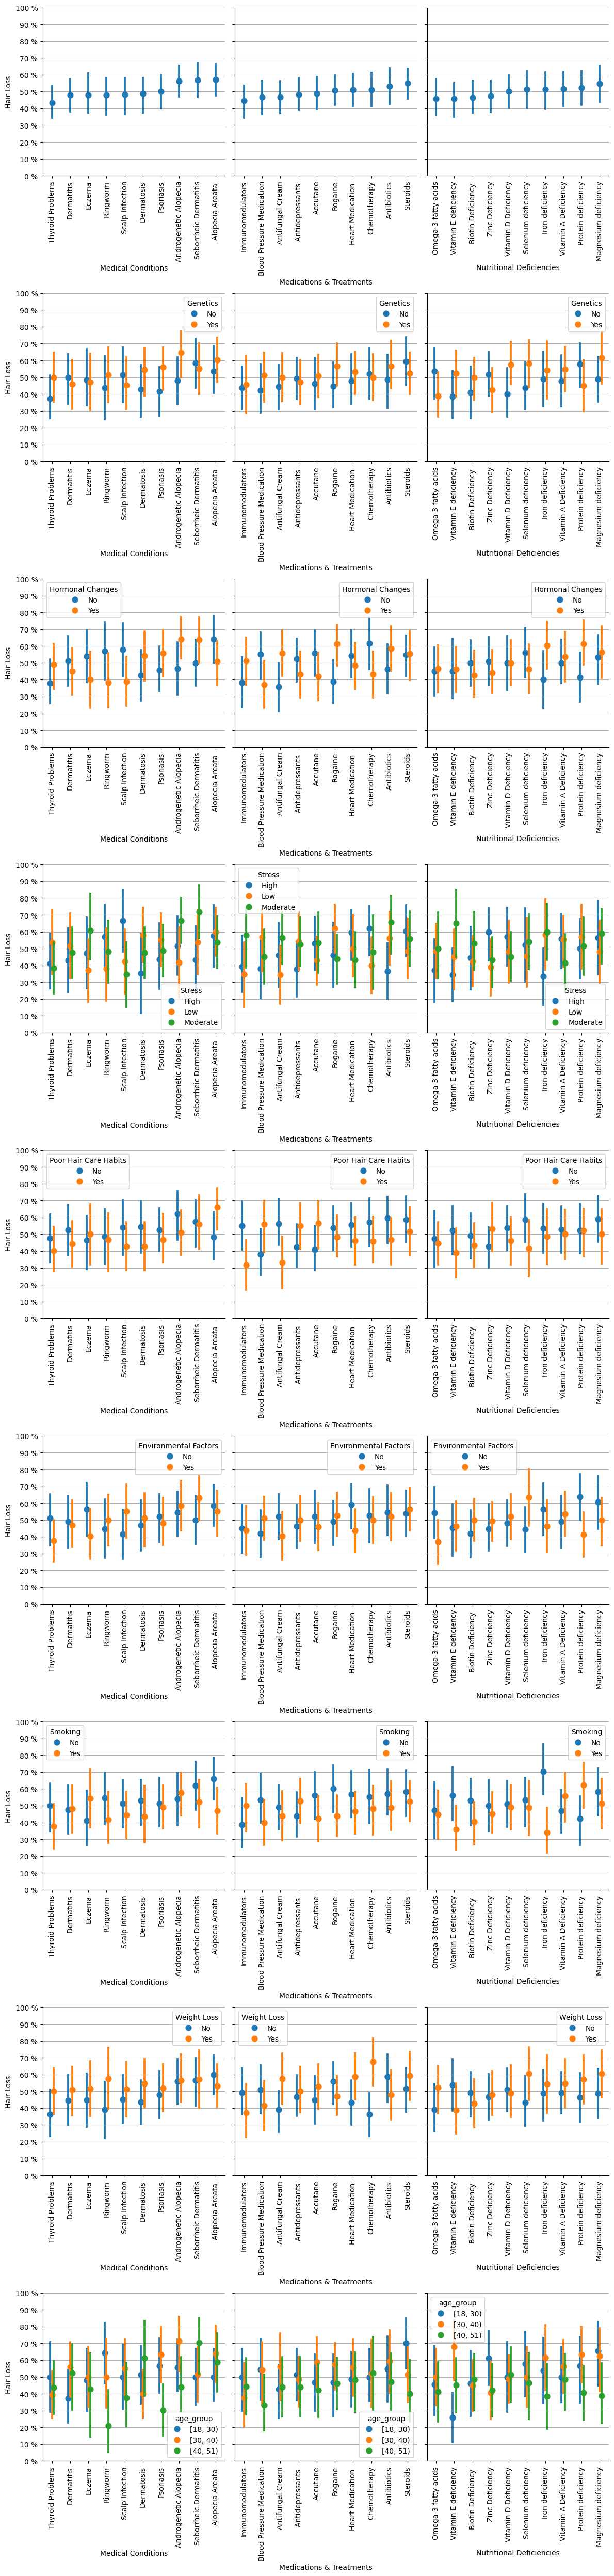

In [14]:
# Create a grid of plots to have a general overview
fig, ax = plt.subplots(len(factors) + 1, len(conditions), sharey=True, figsize=(12, 50))

# Iterate over conditions
for col, condition in enumerate(conditions):

    # List categories from less to more incidence and remove "No Data"
    incidence_order = (
        hairloss.groupby(condition, observed=True)["Hair Loss"]
        .mean()
        .sort_values()
        .index.remove_categories(["No Data"])
        .dropna()
    )

    # Plot in the first row overall incidence of the condition
    sns.pointplot(
        ax=ax[0, col],
        x=condition,
        y="Hair Loss",
        data=hairloss,
        order=incidence_order,
        linestyles="none",
    )
    ax[0, col].grid(axis="y")
    ax[0, col].set_axisbelow(True)
    ax[0, col].tick_params(axis="x", labelsize=10, rotation=90)
    ax[0, col].set_yticks(
        np.arange(0, 1.1, 0.1), labels=[str(n) + " %" for n in list(range(0, 110, 10))]
    )
    sns.despine()

    # For each condition iterate over factors and plot
    for line, factor in enumerate(factors):
        sns.pointplot(
            ax=ax[line + 1, col],
            x=condition,
            y="Hair Loss",
            data=hairloss,
            hue=factor,
            order=incidence_order,
            linestyles="none",
            dodge=0.2,
        )
        ax[line + 1, col].grid(axis="y")
        ax[line + 1, col].set_axisbelow(True)
        ax[line + 1, col].tick_params(axis="x", labelsize=10, rotation=90)
        ax[line + 1, col].set_yticks(
            np.arange(0, 1.1, 0.1),
            labels=[str(n) + " %" for n in list(range(0, 110, 10))],
        )
        sns.despine()

fig.tight_layout()
plt.show()

Overall, confidence intervals overlap in most cases, so from a statistical point of view, we cannot asses clear patterns in the population.

Here I pick up some exceptions where there is no overlap, and therefore the difference is significant and may indicate a pattern:

- If an individual has the condition called _Ringworm_, then age has an influence: in this case, the younger the individual the higher the incidence of baldness.
- If the person is undergoing _Rogaine_ treatment, then hormonal changes relates to baldness more clearly.
- If undergoing _chemotherapy_ treatment, weight loss is clearly more linked to hair loss.
- _Steroids_ cause more hair loss in younger individuals than in older ones.
- _Iron deficiency_ is clearly evident in hair loss among non-smokers compared to smokers, with the latter having a lower incidence of baldness.
- _Vitamin E deficiency_ makes middle aged people more frequently bald compared to young people.

## Machine Learning
I will test out some models to check whether they can learn from the data to predict the hair-loss binary outcome.

4 types of classifiers will be tested:
- Logistic Regression
- K-Nearest Neighbours
- Decision Tree Classifier
- Random Forest Classifier


Results for LogisticRegression():
	Best parameter -> {'C': 0.01}
	Best score in CV -> 0.50
	Score in test-set -> 0.50
	Score in training-set -> 0.58


Results for KNeighborsClassifier():
	Best parameter -> {'n_neighbors': 4}
	Best score in CV -> 0.50
	Score in test-set -> 0.51
	Score in training-set -> 0.66


Results for DecisionTreeClassifier():
	Best parameter -> {'max_depth': 7}
	Best score in CV -> 0.49
	Score in test-set -> 0.55
	Score in training-set -> 0.73


Results for RandomForestClassifier():
	Best parameter -> {'n_estimators': 2}
	Best score in CV -> 0.53
	Score in test-set -> 0.52
	Score in training-set -> 0.81



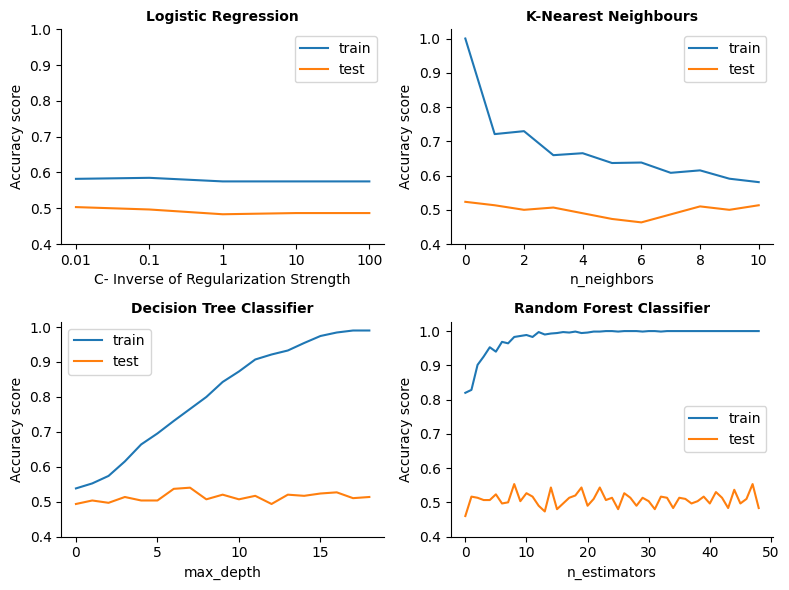

In [15]:
# Define target
target = hairloss["Hair Loss"]

# Define features
features = hairloss.drop(
    [
        "Hair Loss",  # Target
        "Id",  # Not a feature
        "Age",  # "age-group" will be considered instead
    ],
    axis=1,
)

# Identify binary and non-binary features according to number of categories
binary_features = [
    feature
    for feature in features.columns
    if len(features[feature].cat.categories) == 2
]
non_binary_features = [
    feature for feature in features.columns if len(features[feature].cat.categories) > 2
]

# Redefine features creating dummies and avoiding collinearity of binary features
features = pd.concat(
    [
        pd.get_dummies(features[binary_features], drop_first=True, dtype="int"),
        pd.get_dummies(features[non_binary_features], dtype="int"),
    ],
    axis=1,
)

# Drop "No Data" features as they do not provide meaninful info
no_data_features = [feature for feature in features.columns if "_No Data" in feature]
features = features.drop(no_data_features, axis=1)

# Assign target
y = target

# Assign features
X = features

# Scale features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split dataset into training and test set, and stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define classifier models that will be tested
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

# Define ranges for parameters for each model
param_grids = [{"C": [0.01, 0.1, 1, 10, 100]},
               {"n_neighbors": range(1, 12)},
               {"max_depth": range(1, 20)},
               {"n_estimators": range(1, 50)}]

# Search for the best parameter for each model
for model, param_grid in zip(models, param_grids):
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    mdl = model
    mdl_cv = GridSearchCV(mdl, param_grid, cv=kf)
    mdl_cv.fit(X_train, y_train)
    print(f"\nResults for {model}:")
    print(f"\tBest parameter -> {mdl_cv.best_params_}")
    print(f"\tBest score in CV -> {mdl_cv.best_score_:.2f}")
    print(f"\tScore in test-set -> {mdl_cv.score(X_test, y_test):.2f}")
    print(f"\tScore in training-set -> {mdl_cv.score(X_train, y_train):.2f}\n")


# Calculate scores across parameter ranges to plot
# Logistic Regression
test_scores = []
train_scores = []

for C in param_grids[0]["C"]:

    # Instantiate model
    model = LogisticRegression(C=C)

    # Fit model to the training set
    model.fit(X_train, y_train)

    # Store results
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))

    # Build dataframe with the data
    df_lr = pd.DataFrame({"train": train_scores, "test": test_scores})


# K-Nearest Neighbours
test_scores = []
train_scores = []

for n_neighbors in param_grids[1]["n_neighbors"]:

    # Instantiate model
    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit model to the training set
    model.fit(X_train, y_train)

    # Store results
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))

    # Build dataframe with the data
    df_knn = pd.DataFrame({"train": train_scores, "test": test_scores})

# Decision Tree Classifier
test_scores = []
train_scores = []

for max_depth in param_grids[2]["max_depth"]:

    # Instantiate model
    model = DecisionTreeClassifier(max_depth=max_depth)

    # Fit model to the training set
    model.fit(X_train, y_train)

    # Store results
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))

    # Build dataframe with the data
    df_dt = pd.DataFrame({"train": train_scores, "test": test_scores})

# Random Forest Classifier
test_scores = []
train_scores = []

for n_estimators in param_grids[3]["n_estimators"]:

    # Instantiate model
    model = RandomForestClassifier(n_estimators=n_estimators)

    # Fit model to the training set
    model.fit(X_train, y_train)

    # Store results
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))

    # Build dataframe with the data
    df_rf = pd.DataFrame({"train": train_scores, "test": test_scores})

# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
# lr
df_lr.plot(ax=ax[0, 0])
ax[0, 0].set_title("Logistic Regression", fontsize=10, fontweight="bold")
ax[0, 0].set_xlabel("C- Inverse of Regularization Strength", fontsize=10)
ax[0, 0].set_xticks(range(5), labels=["0.01", "0.1", "1", "10", "100"])
# knn
df_knn.plot(ax=ax[0, 1])
ax[0, 1].set_title("K-Nearest Neighbours", fontsize=10, fontweight="bold")
ax[0, 1].set_xlabel("n_neighbors", fontsize=10)
# dt
df_dt.plot(ax=ax[1, 0])
ax[1, 0].set_title("Decision Tree Classifier", fontsize=10, fontweight="bold")
ax[1, 0].set_xlabel("max_depth", fontsize=10)
# rf
df_rf.plot(ax=ax[1, 1])
ax[1, 1].set_title("Random Forest Classifier", fontsize=10, fontweight="bold")
ax[1, 1].set_xlabel("n_estimators", fontsize=10)
# all
for i in range(2):
    for j in range(2):
        ax[i, j].set_ylabel("Accuracy score", fontsize=10)
        ax[i, j].set_yticks(np.arange(0.4, 1.1, 0.1))
sns.despine()
fig.tight_layout()
plt.show()

No matter the model and the parameters assigned, the score for the test set is always around 0.5, which suggests that these models are making predictions that are barely better than random guessing.

Apart from the complexity of the model, that can make it overfit in the training data, it looks like in general the models are underfitting in the test dataset, failing to capture patterns in the data. Maybe (as suggested by the overlapping plots in the previous visual exploratory analysis), the problem is that the features don't provide clear, useful information for predicting the output other than in very specific cases.

If we reduce the features to a two-dimensional space with the help of t-SNE we see that it does not separate the two classes represented by the target.

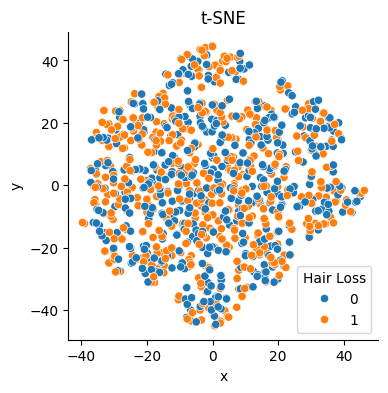

In [16]:
# Prepare dataframe
df_tsne = pd.concat([X, y], axis=1)

# TSNE
tsne = TSNE(learning_rate=50, random_state=42)
tsne_features = tsne.fit_transform(df_tsne.drop("Hair Loss", axis=1))

# Assign values
df_tsne["x"] = tsne_features[:, 0]
df_tsne["y"] = tsne_features[:, 1]

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x="x", y="y", hue="Hair Loss", data=df_tsne, ax=ax)
ax.set_title("t-SNE", fontsize=12)
sns.despine()
plt.show()

It does not seem that features contain enough separable patterns to distinguish the class of interest.

## Conclusions
- Since none of the models considered generalize well to the test data, I conclude that the information is not sufficient to allow predictions based on patterns.
- Despite the scarcity of records (around one thousand) relative to the number of features (around forty), the inability to generalize does not seem to be due to overfitting (memorizing the training data), but rather to underfitting, the absence of patterns. On unseen data, no model has any predictive power, no matter how simple or complex the model is made configuring its parameters.
- Therefore, it also doesn't make sense to conduct an analysis of the features that have the most influence on the final result, since these results are not based on a reproducible predictive rule.